In [16]:
import numpy as np
from tqdm import tqdm_notebook
from sklearn.metrics import log_loss,accuracy_score
from sklearn.datasets import make_blobs,make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.datasets import load_iris
from numpy.linalg import norm

#  Sample Data

In [176]:
iris = load_iris()
data = iris.data
labels = iris.target
print(data.shape,labels.shape)

(150, 4) (150,)


# Color Map

In [177]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

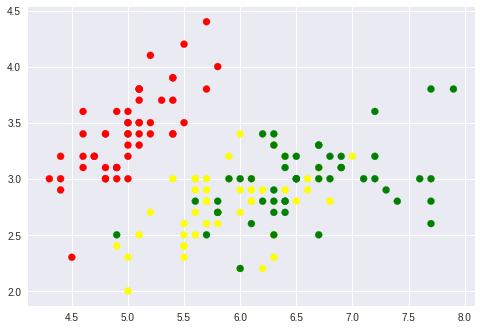

In [178]:
plt.style.use('seaborn')
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

# Train-Test-Split

In [179]:
X_train,X_val,Y_train,Y_val = train_test_split(data,labels,stratify=labels,random_state=0,test_size = 0.2)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)

(120, 4) (120,) (30, 4) (30,)


# One hot encoding of Y_train

In [180]:
enc = OneHotEncoder()
Y_train_one_hot = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
print(Y_train_one_hot.shape)

(120, 3)


/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [22]:
Y_train_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

# Multi-Layer-Perceptron/Feed Forward Nueral Network Class
## With optimizers : Momentum , AdaGrad, RMSProp, Adam

In [192]:
class Nueral_Network:

    def __init__(self,hidden_layer=[4,32,32,3],num_nu1 = 1,num_nu2 = 1,output_layer=4,num_layers = 3,init_algo = 'random',activation='sigmoid'):
        np.random.seed(0)
        self.activation = activation
        self.params = {}
        self.hidden_layer = [4,num_nu1,num_nu2,3]
        self.leaky_slope = 0.1
        self.update_params = {}
        self.gradients = {}
        self.num_layers = num_layers
        
        if(init_algo == 'random'):
            for i in range(1,num_layers + 1):
                self.params['W' + str(i)] = np.random.randn(self.hidden_layer[i-1],self.hidden_layer[i])
                self.params['B' + str(i)] = np.random.randn(1,self.hidden_layer[i])
        elif(init_algo == 'zero'):
            for i in range(1,num_layers + 1):
                self.params['W' + str(i)] = np.zeros((self.hidden_layer[i-1],self.hidden_layer[i]))
                self.params['B' + str(i)] = np.zeros((1,self.hidden_layer[i]))
        elif(init_algo == 'xavier'):
            for i in range(1,num_layers + 1):
                self.params['W' + str(i)] = np.random.randn(self.hidden_layer[i-1],self.hidden_layer[i])*np.sqrt(1/self.hidden_layer[i-1])
                self.params['B' + str(i)] = np.random.randn(1,self.hidden_layer[i])
        elif(init_algo == 'he'):
            for i in range(1,num_layers + 1):
                self.params['W' + str(i)] = np.random.randn(self.hidden_layer[i-1],self.hidden_layer[i])*np.sqrt(2/self.hidden_layer[i-1])
                self.params['B' + str(i)] = np.random.randn(1,self.hidden_layer[i])
        
            
        for i in range(1,num_layers+1):
            self.update_params['v_w' + str(i)] = 0
            self.update_params['v_b' + str(i)] = 0
            self.update_params['m_w' + str(i)] = 0
            self.update_params['m_b' + str(i)] = 0
            
    
    def forward_activation(self,X):
        
        if(self.activation == 'sigmoid'):
            return(1.0/(1.0 + np.exp(-X)))
        elif(self.activation == 'tanh'):
            return(np.tanh(X))
        elif(self.activation == 'relu'):
            return(np.maximum(0,X))
        elif(self.activation == 'leaky relu'):
            return(np.maximum(self.leaky_slope * X,X))
    
    def grad_activation(self,X):
        if(self.activation == 'sigmoid'):
            return(X * (1-X))
        elif(self.activation == 'tanh'):
            return(1-np.square(X))
        elif(self.activation == 'relu'):
            return(1.0 * (X>0))

        elif(self.activation == 'leaky relu'):
            d = np.zeros_like(X)
            d[X<=0] = self.leaky_slope
            d[X>0] = 1.0
            return d
            
    
    def softmax(self,X):
        exps = np.exp(X) # (N,2)
        sums_exp = np.sum(exps,axis=1).reshape(-1,1) #(N,1)
        return(exps/sums_exp) #(N,2) / (N,1) --> (N,2)
        
    
    def forward_pass(self,X):
        
        # Layer 1(Hidden)
        self.params['A1'] = np.matmul(X,self.params['W1']) + self.params['B1'] #(N,2) * (2,4)-->(N,4) + (N,4)
        self.params['H1'] = self.forward_activation(self.params['A1']) # (N,4)
        
        #Layer 2(Hidden)
        self.params['A2'] = np.matmul(self.params['H1'],self.params['W2']) + self.params['B2'] #(N,4) * (4,3)-->(N,3)
        self.params['H2'] = self.forward_activation(self.params['A2']) #(N,3)
        
        #Layer 3(Output)
        self.params['A3'] = np.matmul(self.params['H2'],self.params['W3']) + self.params['B3'] #(N,3) * (3,2)-->(N,2)
        self.params['H3'] = self.softmax(self.params['A3']) #(N,2)
        
        return(self.params['H3']) #(N,2)
    
    def grad(self,X,Y):
        
        self.forward_pass(X)
        
        #Layer 3
        self.gradients['dA3'] = self.params['H3'] - Y #(N,2) - (N,2) -->(N,2)
        self.gradients['dW3'] = np.matmul(self.params['H2'].T,self.gradients['dA3']) # (3,N) * (N,2) -->(3,2)
        self.gradients['dB3'] = np.sum(self.gradients['dA3'],axis=0).reshape(1,-1) 
        
        #Layer 2 
        self.gradients['dH2'] = np.matmul(self.gradients['dA3'],self.params['W3'].T) #(N,2) * (2,3) -- >(N,3)
        self.gradients['dA2'] = np.multiply(self.gradients['dH2'],self.grad_activation(self.params['H2'])) #(N,3) * (N,3)-->(N,3)
        self.gradients['dW2'] = np.matmul(self.params['H1'].T,self.gradients['dA2']) #(4,N) * (N,3)   --> (4,3)
        self.gradients['dB2'] = np.sum(self.gradients['dA2'],axis=0).reshape(1,-1)
        
        #Layer 1
        self.gradients['dH1'] = np.matmul(self.gradients['dA2'],self.params['W2'].T) #(N,3) * (3,4) -->(N,4)
        self.gradients['dA1'] = np.multiply(self.gradients['dH1'],self.grad_activation(self.params['H1'])) #(N,4) * (N,4)
        self.gradients['dW1'] = np.matmul(X.T,self.gradients['dA1']) #(2,N) * (N,4) -->(2,4)
        self.gradients['dB1'] = np.sum(self.gradients['dA1'],axis=0).reshape(1,-1)
    
    def get_accuracy(self):
        
        Y_pred_train = self.predict(X_train)
        Y_pred_train = np.argmax(Y_pred_train,axis=1)
        Y_pred_val = self.predict(X_val)
        Y_pred_val = np.argmax(Y_pred_val,axis=1)
        
        train_accuracy = accuracy_score(Y_pred_train,Y_train)
        val_accuracy = accuracy_score(Y_pred_val,Y_val)
        
        return train_accuracy,val_accuracy
        
    def fit(self,X,Y,l2_norm=False,lambda_val=0.8,epochs=1,eta=1,display_loss = False,algo='GD',gamma=0.8,eps = 1e-8,beta = 0.8,beta1=0.8,beta2=0.8):
        
        if(display_loss):
            training_loss = {}
            training_acc = {}
            val_acc = {}
            weight_mag = {}
        
        for epoch in tqdm_notebook(range(epochs),unit="epoch",total=epochs):
            
            if(algo == 'GD'):
            
                self.grad(X,Y)

                m = X.shape[0]
                for i in range(1,self.num_layers+1):
                    
                    
                    if(l2_norm):
                        self.params['W' + str(i)] -= (eta * lambda_val)/m * self.params['W' + str(i)] + eta * (self.gradients['dW' + str(i)]/m)
                    else:
                        self.params['W' + str(i)] -= eta * (self.gradients['dW' + str(i)]/m)
                    self.params['B' + str(i)] -= eta * (self.gradients['dB'+ str(i)]/m)
                

                Y_pred = self.predict(X)
                training_loss[epoch] = log_loss(np.argmax(Y,axis=1),Y_pred)
                train,val = self.get_accuracy()
                training_acc[epoch] = train
                val_acc[epoch] = val
                weight_mag[epoch] = (norm(self.params['W1']) + norm(self.params['W2']) + norm(self.params['W3']) + norm(self.params['B1']) + norm(self.params['B2']) + norm(self.params['B3']))/18
                
            
            elif(algo == 'Momentum'):
                self.grad(X,Y)
                m = X.shape[0]
                
                for i in range(1,self.num_layers+1):
                
                    self.update_params['v_w' + str(i)] = gamma*self.update_params['v_w' + str(i)] + eta * (self.gradients['dW' + str(i)])/m
                    self.update_params['v_b' + str(i)] = gamma*self.update_params['v_b' + str(i)] + eta * (self.gradients['dB' + str(i)])/m
                    self.params['W' + str(i)] -= self.update_params['v_w' + str(i)]
                    self.params['B' + str(i)] -= self.update_params['v_b' + str(i)]
                
                Y_pred = self.predict(X)
                training_loss[epoch] = log_loss(np.argmax(Y,axis=1),Y_pred)
                
            
            elif(algo == 'AdaGrad'):
                self.grad(X,Y)
                m = X.shape[0]
                
                for i in range(1,self.num_layers+1):
                    
                    self.update_params['v_w' + str(i)] = self.update_params['v_w' + str(i)] + ((self.gradients['dW' + str(i)]/m) ** 2)
                    self.update_params['v_b' + str(i)] = self.update_params['v_b' + str(i)] + ((self.gradients['dB' + str(i)]/m) ** 2)
                    self.params['W' + str(i)] -= (eta/np.sqrt(self.update_params['v_w' + str(i)]+eps)) * self.gradients['dW' + str(i)]/m
                    self.params['B' + str(i)] -= (eta/np.sqrt(self.update_params['v_b' + str(i)]+eps)) * self.gradients['dB' + str(i)]/m
                
                Y_pred = self.predict(X)
                loss[epoch] = log_loss(np.argmax(Y,axis=1),Y_pred)
            
            elif(algo == 'RMSProp'):
                self.grad(X,Y)
                m = X.shape[0]
                
                for i in range(1,self.num_layers+1):
                    
                    self.update_params['v_w' + str(i)] = beta*self.update_params['v_w' + str(i)] + (1-beta)*((self.gradients['dW' + str(i)]/m) ** 2)
                    self.update_params['v_b' + str(i)] = beta*self.update_params['v_b' + str(i)] + (1-beta)*((self.gradients['dB' + str(i)]/m) ** 2)
                    self.params['W' + str(i)] -= (eta/np.sqrt(self.update_params['v_w' + str(i)]+eps)) * self.gradients['dW' + str(i)]/m
                    self.params['B' + str(i)] -= (eta/np.sqrt(self.update_params['v_b' + str(i)]+eps)) * self.gradients['dB' + str(i)]/m
                    
                Y_pred = self.predict(X)
                loss[epoch] = log_loss(np.argmax(Y,axis=1),Y_pred)
            
            elif(algo == 'Adam'):
                self.grad(X,Y)
                m = X.shape[0]
                num_updates = 0
                for i in range(1,self.num_layers+1):
                    num_updates+=1

                    self.update_params['m_w' + str(i)] = beta1*self.update_params['m_w' + str(i)] + ((1-beta1) * self.gradients['dW' + str(i)]/m) 
                    self.update_params['m_b' + str(i)] = beta1*self.update_params['m_b' + str(i)] + ((1-beta1) * self.gradients['dB' + str(i)]/m) 
                    self.update_params['v_w' + str(i)] = beta2*self.update_params['v_w' + str(i)] + ((1-beta2) * ((self.gradients['dW' + str(i)]/m)**2))
                    self.update_params['v_b' + str(i)] = beta2*self.update_params['v_b' + str(i)] + ((1-beta2) * ((self.gradients['dB' + str(i)]/m)**2))
                    m_w_hat=self.update_params["m_w"+str(i)]/(1-np.power(beta1,num_updates))
                    v_w_hat=self.update_params["v_w"+str(i)]/(1-np.power(beta2,num_updates))
                    m_b_hat=self.update_params["m_b"+str(i)]/(1-np.power(beta1,num_updates))
                    v_b_hat=self.update_params["v_b"+str(i)]/(1-np.power(beta2,num_updates))

                    self.params['W' + str(i)] -= (eta/np.sqrt(v_w_hat + eps))* m_w_hat
                    self.params['B' + str(i)] -= (eta/np.sqrt(v_b_hat + eps))* m_b_hat
                
                Y_pred = self.predict(X)
                loss[epoch] = log_loss(np.argmax(Y,axis=1),Y_pred)
                    
                

        if(display_loss):
            fig,ax1 = plt.subplots()
            
            ax1.plot(list(training_loss.values()),label='Loss')
            ax1.set_title('Loss Plot')
            ax1.set_xlabel('Epochs')
            ax1.set_ylabel('Log Loss')
            ax2 = ax1.twinx()
            ax2.set_ylabel('Weight Magnitude')
            ax2.plot(list(weight_mag.values()),color='r',label='Weight Magnitude')
            plt.legend()
            plt.show()
            
        if(display_loss):
            plt.figure()
            plt.plot(list(training_acc.values()),label='Training Loss',color='blue')
            plt.plot(list(val_acc.values()),label='Validation Loss',color='green')
            plt.plot(np.ones((epochs,1))*0.9,label='High Standard',color='red')
            plt.plot(np.ones((epochs,1))*0.33,label='Lowest Standard',color='violet')
            plt.title('Accuracy Plot')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend(loc='upper right')
            plt.show()
    
    def predict(self,X):
        Y_pred = []
        return(np.asarray(self.forward_pass(X))) #(N,2)
        
        
                            
        
        
    

In [182]:
def print_accuracy():
    Y_pred_train = mlp.predict(X_train)
    Y_pred_train = np.argmax(Y_pred_train,axis=1)
    Y_pred_val = mlp.predict(X_val)
    Y_pred_val = np.argmax(Y_pred_val,axis=1)
    
    training_accuracy = accuracy_score(Y_train,Y_pred_train)
    validation_accuracy = accuracy_score(Y_val,Y_pred_val)
    
    print(f'The training accuracy is: {np.round(training_accuracy*100,4)}')
    print(f'The validation accuracy is: {np.round(validation_accuracy*100,4)}')

# Model Running

In [104]:
mlp = Nueral_Network(init_algo='xavier',activation='sigmoid',num_nu1=16,num_nu2=32)

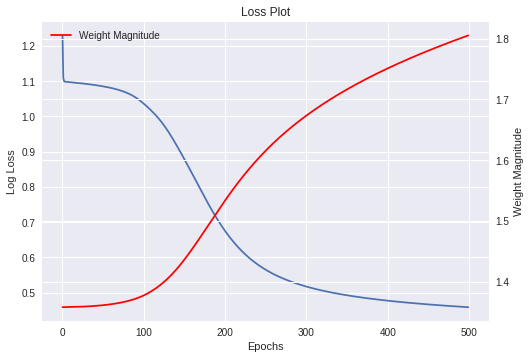

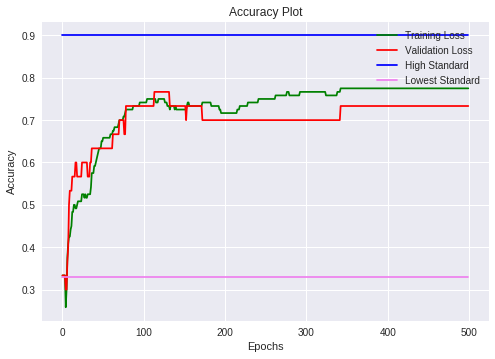

The training accuracy is: 77.5
The validation accuracy is: 73.3333


In [105]:

mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=500,eta=0.25,beta=0.8,algo='GD')
print_accuracy()

# Xavier Init with Sigmoid Activation with Regularization
## When Lambda_val (regularization param) = 10. More weightage is given to Weight minimizing so our model does not learn anything.
### lambda_val = 1. It learns

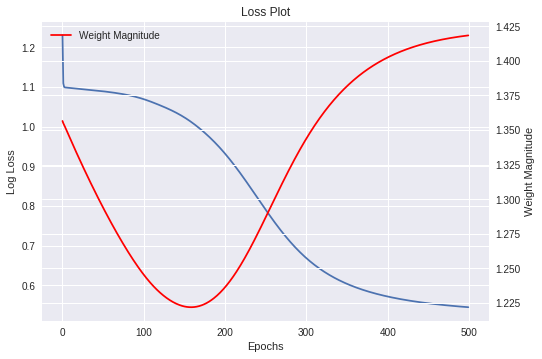

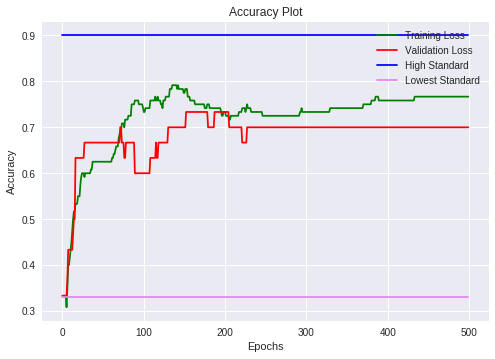

The training accuracy is: 76.6667
The validation accuracy is: 70.0


In [106]:
mlp = Nueral_Network(init_algo='xavier',activation='sigmoid',num_nu1=16,num_nu2=32)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=500,eta=0.25,beta=0.8,algo='GD',l2_norm=True,lambda_val = 1)
print_accuracy()

# Xavier with Tanh activation.

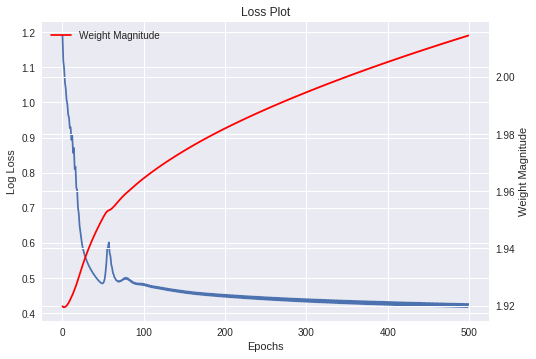

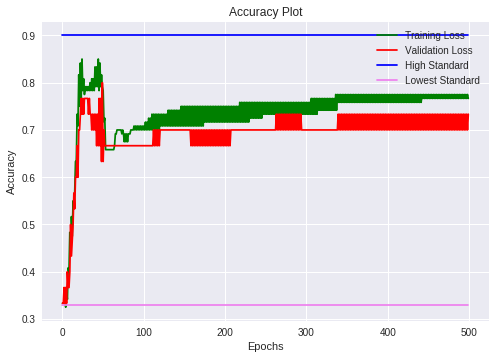

The training accuracy is: 76.6667
The validation accuracy is: 73.3333


In [107]:
mlp = Nueral_Network(init_algo='xavier',activation='tanh',num_nu1=64,num_nu2=64)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=500,eta=0.1,beta=0.8,algo='GD')
print_accuracy()

#  with relu

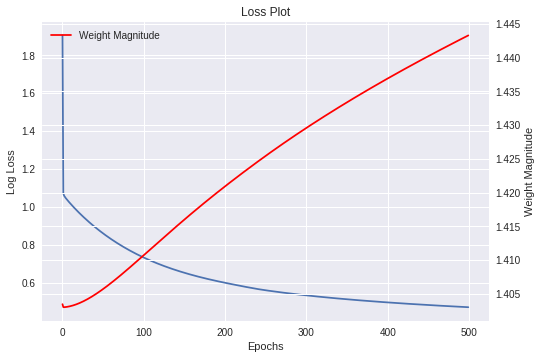

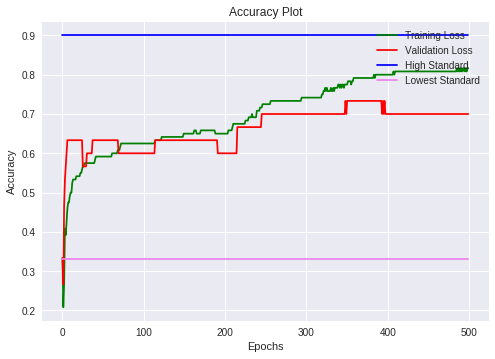

The training accuracy is: 81.6667
The validation accuracy is: 70.0


In [108]:
mlp = Nueral_Network(init_algo='xavier',activation='relu',num_nu1=32,num_nu2=32)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=500,eta=0.01,beta=0.8,algo='GD')
print_accuracy()

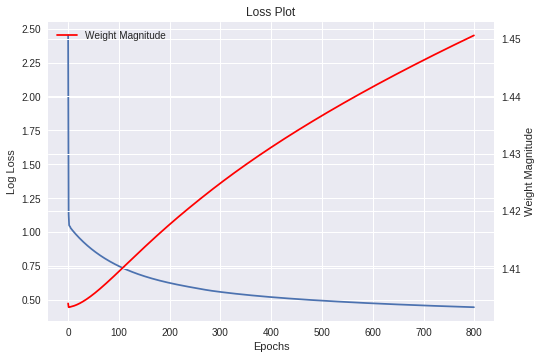

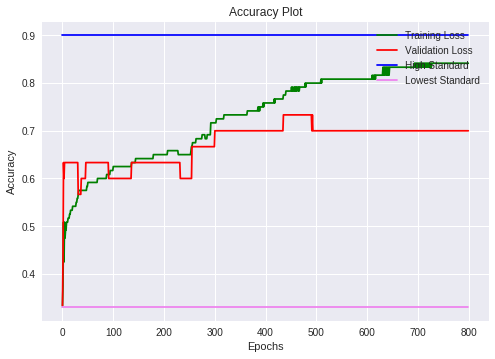

The training accuracy is: 84.1667
The validation accuracy is: 70.0


In [117]:
mlp = Nueral_Network(init_algo='xavier',activation='relu',num_nu1=32,num_nu2=32)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=800,eta=0.008,beta=0.8,algo='GD')
print_accuracy()

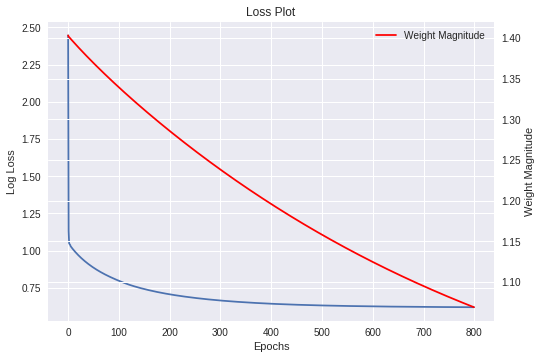

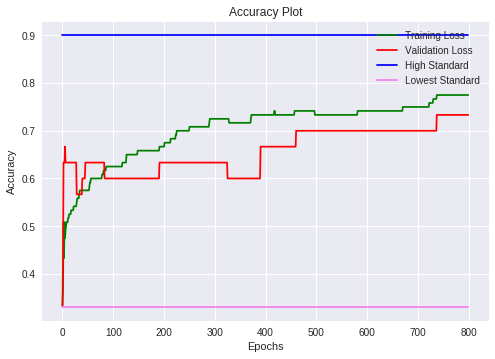

The training accuracy is: 77.5
The validation accuracy is: 73.3333


In [121]:
mlp = Nueral_Network(init_algo='xavier',activation='relu',num_nu1=32,num_nu2=32)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=800,eta=0.008,beta=0.8,algo='GD',l2_norm=True,lambda_val=15)
print_accuracy()

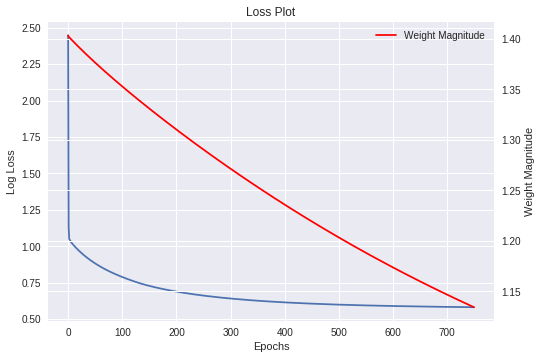

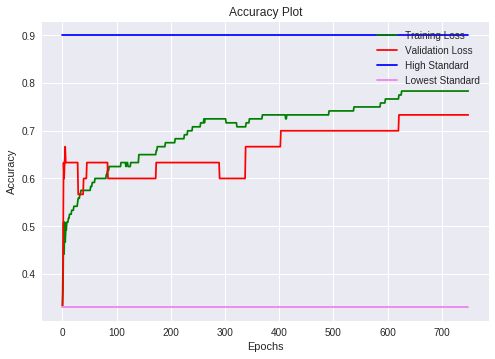

The training accuracy is: 78.3333
The validation accuracy is: 73.3333


In [124]:
mlp = Nueral_Network(init_algo='xavier',activation='relu',num_nu1=32,num_nu2=32)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=750,eta=0.008,beta=0.8,algo='GD',l2_norm=True,lambda_val=12)
print_accuracy()

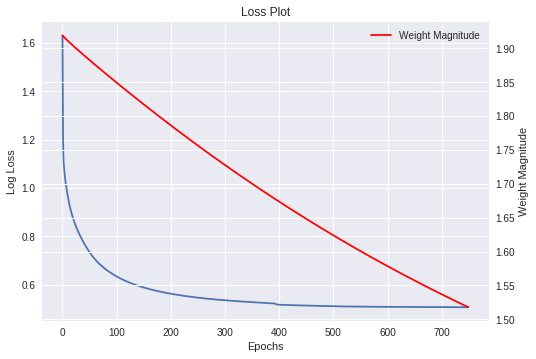

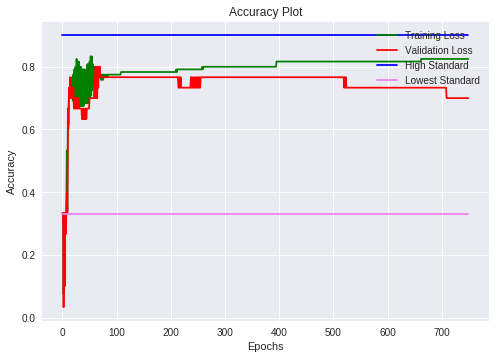

The training accuracy is: 82.5
The validation accuracy is: 70.0


In [126]:
mlp = Nueral_Network(init_algo='xavier',activation='relu',num_nu1=64,num_nu2=64)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=750,eta=0.008,beta=0.8,algo='GD',l2_norm=True,lambda_val=12)
print_accuracy()

## Early Stopping

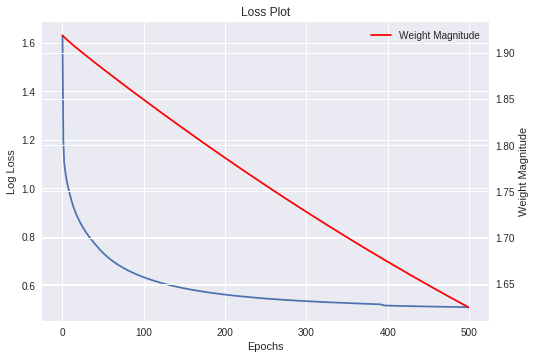

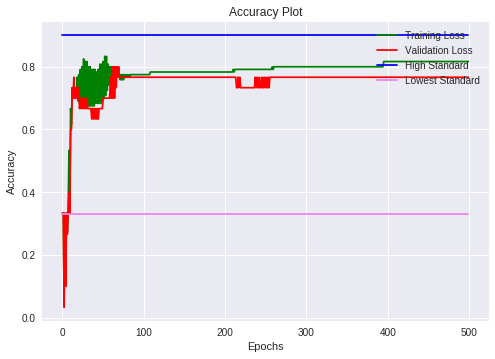

The training accuracy is: 81.6667
The validation accuracy is: 76.6667


In [127]:
mlp = Nueral_Network(init_algo='xavier',activation='relu',num_nu1=64,num_nu2=64)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=500,eta=0.008,beta=0.8,algo='GD',l2_norm=True,lambda_val=12)
print_accuracy()

# He with Relu

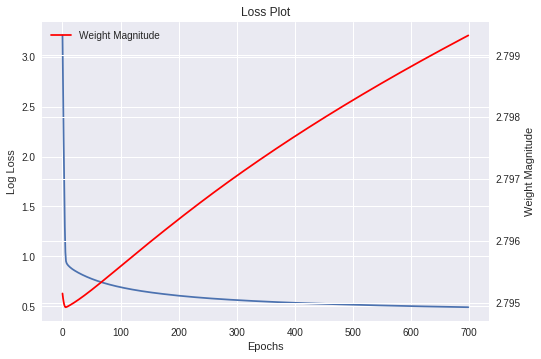

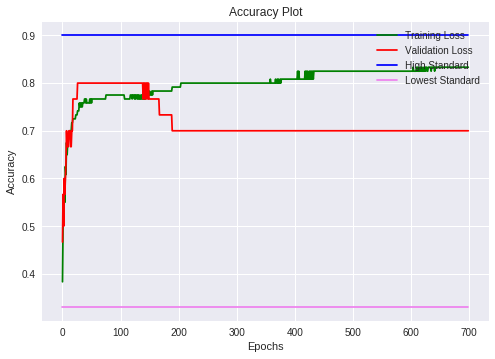

The training accuracy is: 83.3333
The validation accuracy is: 70.0


In [153]:
mlp = Nueral_Network(init_algo='he',activation='relu',num_nu1=128,num_nu2=64)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=700,eta=0.001,beta=0.8,algo='GD')
print_accuracy()

# Now model with all 4 features. 

# Xavier with sigmoid

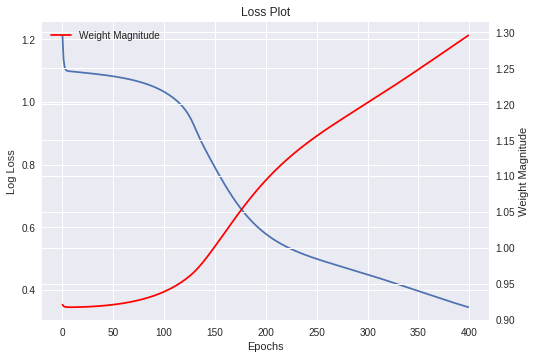

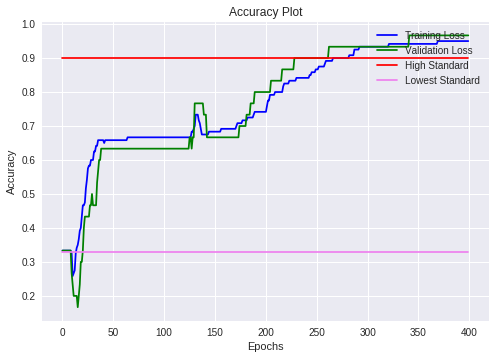

The training accuracy is: 95.0
The validation accuracy is: 96.6667


In [227]:
mlp = Nueral_Network(init_algo='xavier',activation='sigmoid',num_nu1=8,num_nu2=16)
mlp.fit(X_train,Y_train_one_hot,disp`lay_loss=True,epochs=400,eta=0.2,beta=0.8,algo='GD')
print_accuracy()

# Xavier with tanh

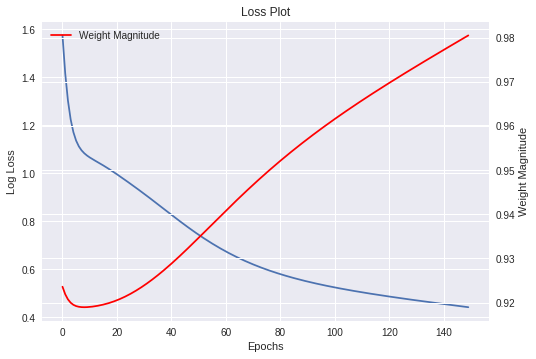

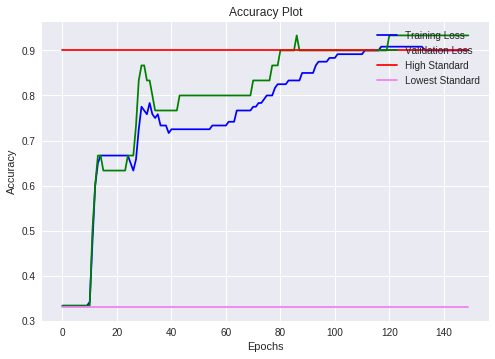

The training accuracy is: 90.0
The validation accuracy is: 93.3333


In [252]:
mlp = Nueral_Network(init_algo='xavier',activation='tanh',num_nu1=8,num_nu2=16)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=150,eta=0.05,beta=0.8,algo='GD')
print_accuracy()

# He with ReLU

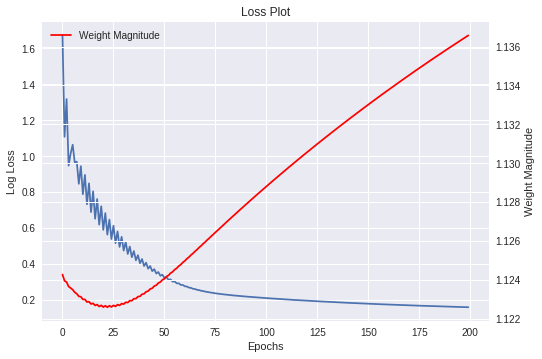

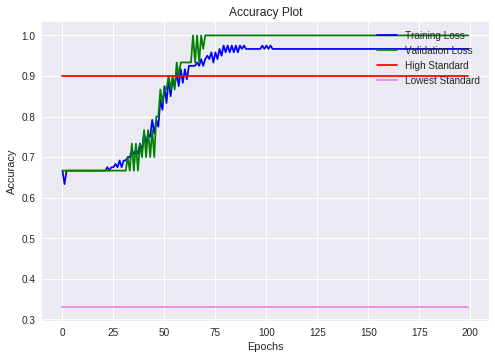

The training accuracy is: 96.6667
The validation accuracy is: 100.0


In [259]:
mlp = Nueral_Network(init_algo='he',activation='relu',num_nu1=8,num_nu2=16)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=200,eta=0.01,beta=0.8,algo='GD')
print_accuracy()

# He with Leaky Relu

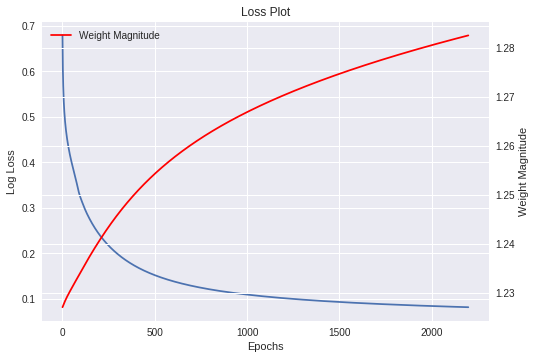

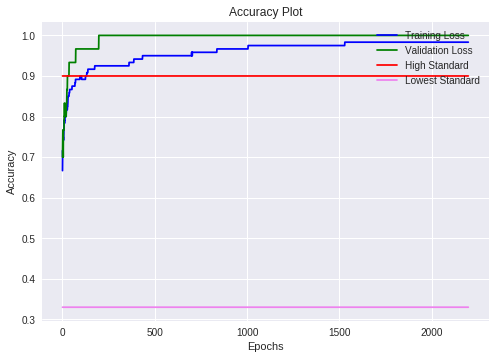

The training accuracy is: 98.3333
The validation accuracy is: 100.0


In [275]:
mlp = Nueral_Network(init_algo='he',activation='leaky relu',num_nu1=16,num_nu2=16)
mlp.fit(X_train,Y_train_one_hot,display_loss=True,epochs=2200,eta=0.01,beta=0.8,algo='GD')
print_accuracy()